<a href="https://colab.research.google.com/github/mathcarl/Introduction-to-Data-Science/blob/main/_A2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 5768 - Data Science 


# Assignment 2: Exploratory Data Analysis (EDA)
## STARTER 

### Goals 

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [ ]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv') 
#salaries = pd.read_csv('./data/salaries.csv') 
salaries=pd.DataFrame(salaries)
print(salaries.shape)
print(salaries.count())
salaries['sex']=salaries['sex'].str.capitalize() # Capitalize all first letter in column (sex).


(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


### 1.1 Your turn! (2 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable _to the best of your knowledge_)

In [ ]:
# Find information about the variables
salaries=salaries.astype({'height': int}) # Convert height to integers

salaries.columns # Print name of each column

salaries.info() # Type of data in the columns

salaries.head() # The first 5 rows in the data




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   int64  
 2   sex     1192 non-null   object 
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 56.0+ KB


,earn,height,sex,ed,age,race
0,50000.0,74,Male,16,45,white
1,60000.0,65,Female,16,58,white
2,30000.0,63,Female,16,29,white
3,50000.0,63,Female,16,91,other
4,51000.0,63,Female,17,39,white


In [ ]:
salaries.tail() # print the last 5 rows of the data.

,earn,height,sex,ed,age,race
1187,19000.0,72,Male,12,29,white
1188,15000.0,61,Female,18,82,white
1189,8000.0,63,Female,12,33,white
1190,60000.0,71,Male,12,50,white
1191,6000.0,68,Male,12,27,white


***Description of columns***

The data has 1192 samples and 6 attributes(3 integers, 1 float, 2 objects)  that include:
1.   earn = Annual salary( USD ).
2.   height = Height in inches.
3.   sex =  Gender of employee male or female.
4.   ed = Education in years
5.   age = Age of employees measured in years.
6.   race = Race of employees white or others.








--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [ ]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


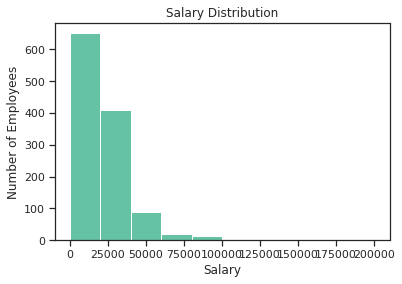

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

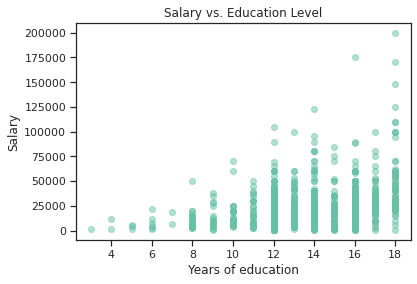

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.2 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [ ]:

#Total headcount and percentage

#Create Variables to find the count
counts = salaries.sex.value_counts() # Total Headcount by gender. Value_count returns object counts with unique values
percent = salaries.sex.value_counts(normalize=True).mul(100).round(1).astype(str)+'%' # Percentage by gender
head_count=pd.DataFrame({'Counts':counts,'Percent':percent}) # Makes a DataFrame to include the variables

#Statistical Data

# Use groupby and aggregate to find values, and adds them to a dataframe.
descriptive = salaries[['sex','earn']].groupby('sex').aggregate(['min','max','mean','median','std'])


In [ ]:
print("Gender headcount")
head_count

Gender headcount


,Counts,Percent
Female,687,57.6%
Male,505,42.4%


In [ ]:
print('Descriptive data')
descriptive

Descriptive data


earn                                               
           min       max          mean   median           std
sex                                                          
Female   200.0  123000.0  18280.195051  15000.0  14259.932378
Male    1000.0  200000.0  29786.130693  25000.0  23297.816034

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Gender')

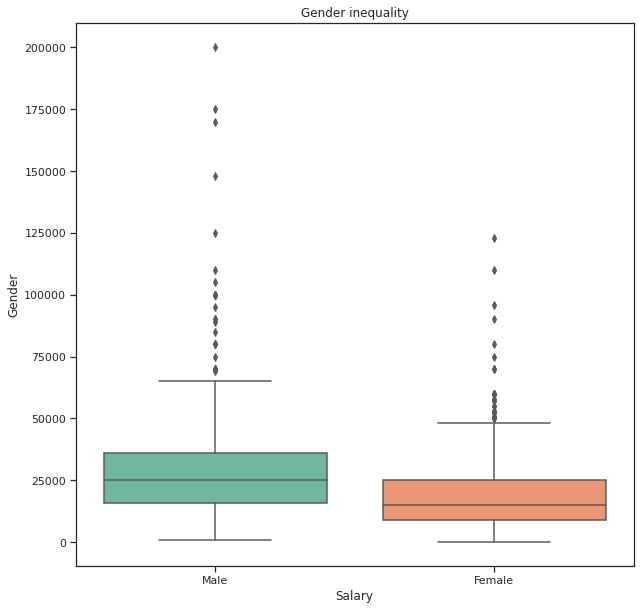

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(salaries['sex'],y=salaries['earn'])
plt.title("Gender inequality")
plt.xlabel("Salary")
plt.ylabel("Gender")

Boxplot comparison of gender inequality. We can see a variation in the gender central tendency  where the median salary for males is 25000 while the median for females is 15000.  

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc.. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.3 Your turn! (18-26 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not). 

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. 

**Weight**: 18 pts, i.e., 6 pts per hypothesis. 
Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.  

###H1: Older employees are paid less

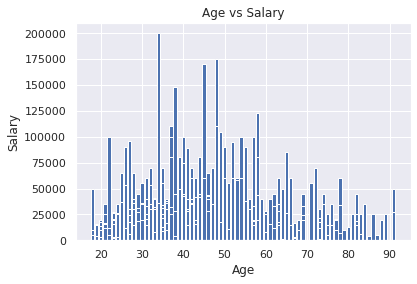

In [ ]:
# Data distribution for age and salaries
Age_salary=np.array(salaries['age']) # variable for age and salary
sns.set()
plt.bar(Age_salary,salary)# Create a graph  comparing age vs salary
# Graph description
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()









We can visualize a significant drop in salary at an older age.





In [ ]:
# Create a variable and find possible if their is a correlation 
salaries['older_employees'] = salaries['age']>60
# Pearson correlation it's the ratio of the covariance of age(x) and salary(y) 
# To the product of their standard deviation
r,p=pearsonr(salaries['earn'],salaries['older_employees']) # test for coveriance and the p-value
print(f"Result of the Correlation Coefficient {r} and a P-Value of:{p}.")
print(len(salaries['older_employees']))

Result of the Correlation Coefficient -0.09108937257262509 and a P-Value of:0.0016431308304418399.
1192


There exist a strong negative correlation between older employees above 60 years old and salary. 

In [ ]:
#  Find the median salary for employees according to age and other variables.
age_variables=salaries.groupby('older_employees').aggregate("median")
#Age_variables.aggregate('median') # Used  median to eliminate any outliers in the data 

age_variables

,earn,height,ed,age
older_employees,,,,
False,20000.0,66,13,35
True,15000.0,65,12,69


###H2: Female employees are pay less

<function matplotlib.pyplot.show>

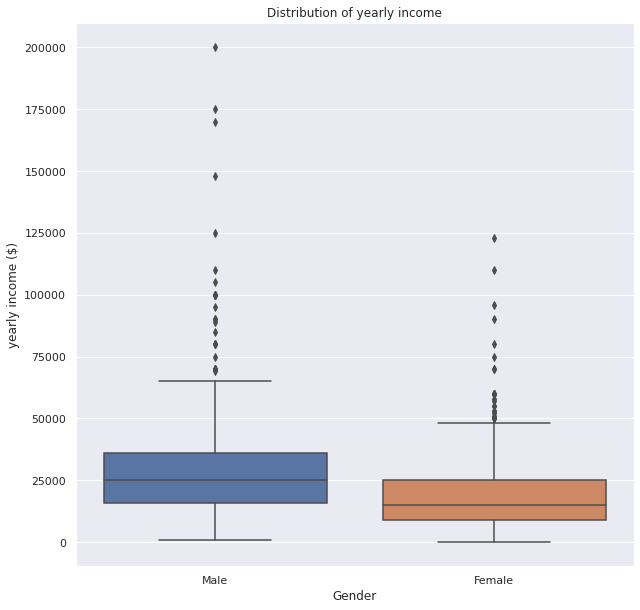

In [ ]:
# Create a boxplot to compare the data
plt.figure(figsize=(10,10)) 
sns.boxplot(x='sex',y='earn',data=salaries)# Boxplot for Gender and salary
plt.ylabel("yearly income ($)",fontsize=12) 
plt.xlabel("Gender")
plt.title("Distribution of yearly income")
plt.show


There exist a variation in the median salary between male and female. 

In [ ]:
# Create a hypothesis to prove a bias in the data
female_salaries=salaries['sex']=='Female' #Variable to find the subgroup of female in sex
male_salaries=salaries['sex']=='Male'# Variable to find the subgroup of male in sex
female_median=salaries[female_salaries]['earn'].median()# Find the median of females salaries
male_median= salaries[male_salaries]['earn'].median()# Find the median of male salaries

if male_median>female_median:
  print("H1  hypothesis is true")
else:
  print("H1 hypothesis is false")



H1  hypothesis is true


In [ ]:
# test for a correlation 
corr,p = pearsonr(salaries['earn'],female_salaries)
print('Female correlation',corr,p)
corr,p = pearsonr(salaries['earn'],male_salaries)
print("Male correlation",corr,p)


Female correlation -0.2921021854657078 7.060592775977876e-25
Male correlation 0.2921021854657079 7.060592775977876e-25


In [ ]:
# Possible other correlation 
salaries.groupby('sex').mean()

,earn,height,ed,age,older_employees
sex,,,,,
Female,18280.195051,64.116448,13.436681,42.259098,0.161572
Male,29786.130693,69.556436,13.596040,40.180198,0.142574


There exist a moderate negative correlation between female and salary. However, there is a positive correlation between male and salary. Thus we can conclude that Females are paid less in this population and demostrated by the correlation. 

###H3:Non-Whites employees are paid less.

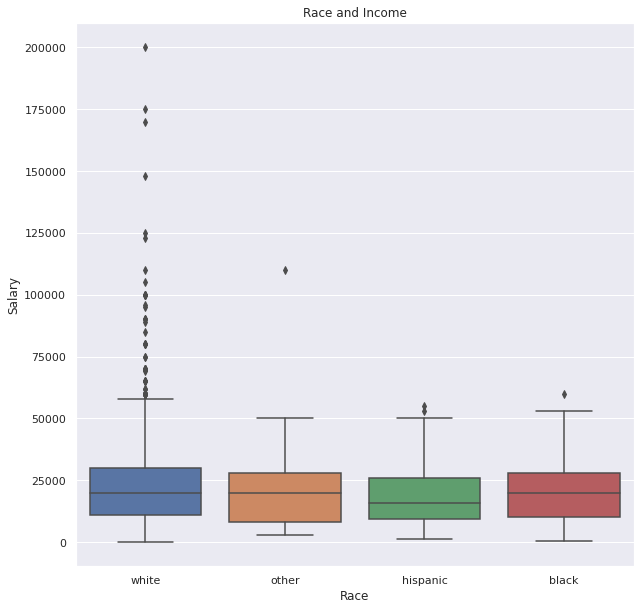

In [ ]:
# H3 Plot a boxplot to compare the median of race and income
plt.figure(figsize=(10,10))
sns.boxplot(x="race",y="earn",data=salaries)
plt.ylabel("Salary")
plt.xlabel("Race")
plt.title("Race and Income")
plt.show()

We can intepret there is a small variance in the median salary in between races. Futher, calculations are necessary.

In [ ]:
# Find the statistics for race and salary
non_whites=salaries["race"]!="white" # variable for nonwhites as values that are not white.
# Groupby and aggregate to the list stats values
race_stat=salaries[['race','earn']].groupby('race').aggregate(['min','max','mean','median','std'])
race_stat


earn                                               
             min       max          mean   median           std
race                                                           
black      600.0   60000.0  19624.214286  20000.0  11947.743273
hispanic  1400.0   55000.0  18263.636364  16000.0  12832.526418
other     3000.0  110000.0  23096.640000  20000.0  21790.796580
white      200.0  200000.0  23882.469161  20000.0  20374.730127

There exist a small variance in salary between races. However, there exists a significant percentage of outlier for whites in the data. White's maximum salary is 20000 compared to other races that are significantly lower.Therefore, we cannot determine if there exists a significant level of discrimination.

-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [ ]:
data.dropna(inplace=True) # Remove missing values
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### 2.1 Your turn! (10-12 points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)


In [ ]:

#Get indexes in column with 3 cylinders
cylinder_three=data[data['cylinders']==3].index#  3 pistons engines in the column
print(f"The number of three cylinders {len(cylinder_three)}.") # print the lenght of 3 pistons engines in the column

cylinder_five=data[data['cylinders']==5].index #  5 pistons engines in the column
print(f"The number of five cylinders {len(cylinder_five)}.")# print the lenght of 5 pistons engines in the column






The number of three cylinders 4.
The number of five cylinders 3.


In [ ]:
# Discard the entries of 3 and 5 cylinders
data.drop(cylinder_three,inplace=True)
data.drop(cylinder_five,inplace=True)
len(data) # lenght of the data after deleting the entries


385

In [ ]:
#Compute and Display min,max and avarage fuel consumption.
data[['mpg','cylinders']].groupby('cylinders').aggregate(['min','max','mean'])

mpg                 
            min   max       mean
cylinders                       
4.0        18.0  46.6  29.283920
6.0        15.0  38.0  19.973494
8.0         9.0  26.6  14.963107

Optional problem

In [ ]:
# Display the most and least fuel effient vehicles.

Least_Efficient=data[['mpg','car_name']].min()
Most_Efficient=data[['mpg','car_name']].max()
print(f"The least efficient car is:{Least_Efficient}")
print(f"The most efficient car is:{Most_Efficient}")

The least efficient car is:mpg                               9
car_name    amc ambassador brougham
dtype: object
The most efficient car is:mpg                     46.6
car_name    vw rabbit custom
dtype: object


*Enter your text here*

--------------------
### Hypotheses and questions

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### 2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mpg vs Horsepower')

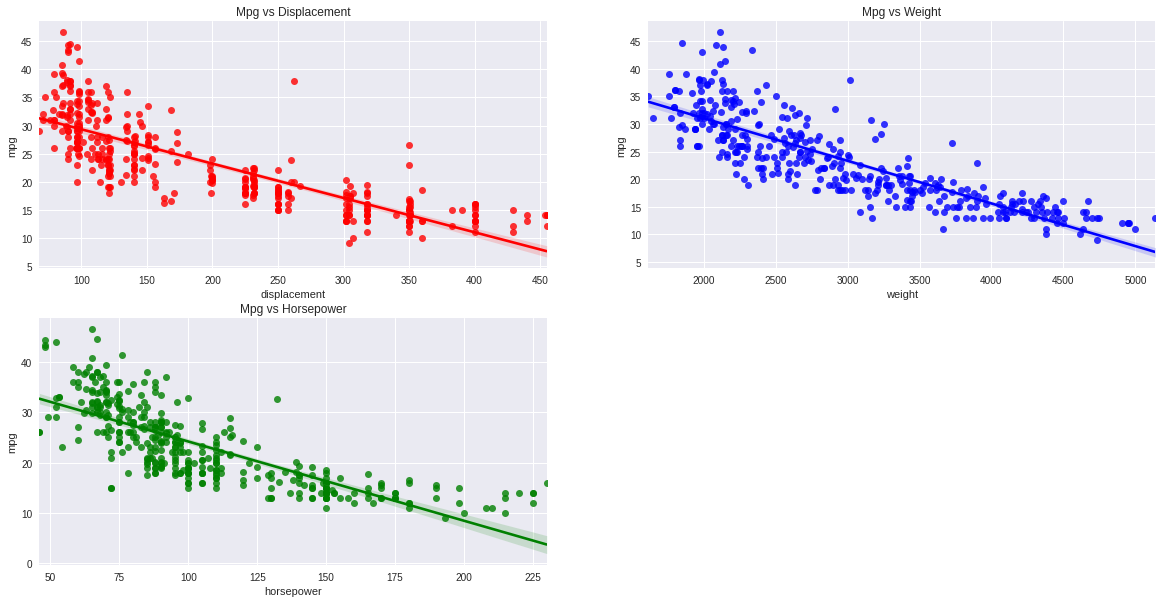

In [ ]:
# Create a plot for the different relationships
y=data["mpg"]
x1=data["displacement"]
x2=data["weight"]
x3=data["horsepower"]
plt.style.use('seaborn') # style used

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)# Subplot number
sns.regplot(x1,y,color="red")# apply regression to the plot
plt.title("Mpg vs Displacement")


plt.subplot(2,2,2)# subplot number
sns.regplot(x2,y,color="blue")# apply regression to the plot
plt.title("Mpg vs Weight")

plt.subplot(2,2,3)# subplot number
sns.regplot(x3,y,color="green")# apply regresion to the plot
plt.title("Mpg vs Horsepower")

There exist a relationship between the graphs. We can conclude that engine size, weight, and horsepower have a negative impact on the perfomance of the vehicle.



### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not). 

**Weight**: 20 pts, i.e., 10 pts per hypothesis. 
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments. 

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



##H4: Fuel efficiency improved over the years

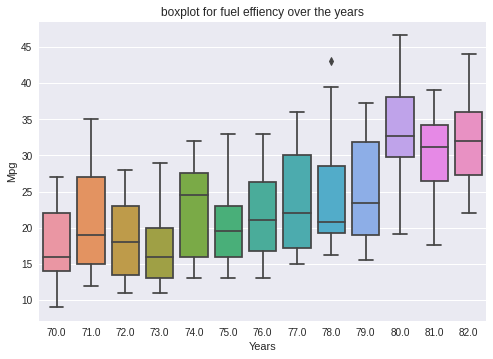

In [ ]:
#Build a boxplot for every model and year
plt.figure()
sns.boxplot(x='model',y='mpg',data=data)# Boxplot comparing model(year) and Mpg
#labels and title
plt.xlabel('Years')
plt.ylabel("Mpg")
plt.title("boxplot for fuel effiency over the years")
plt.show()

We can see a slight increase in the median in the plot of years and mpg.

Text(0, 0.5, 'Mpg Mean')

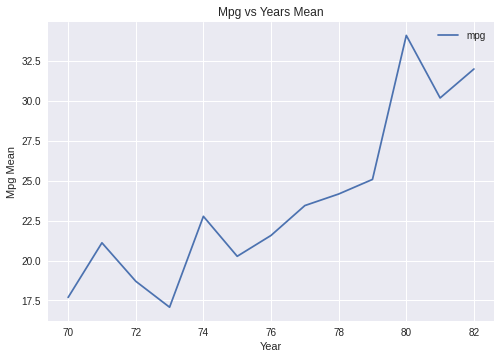

In [ ]:
data[['mpg','model']].groupby('model').mean().plot() # plot the mean values of mpg and years
# labels
plt.title('Mpg vs Years Mean')
plt.xlabel("Year")
plt.ylabel("Mpg Mean")

We can clearly see an increase of the mean in car effiency thru the years.

##H5: Japanese cars are more efficient than american and european.



Text(0.5, 1.0, 'Most Efficient Country')

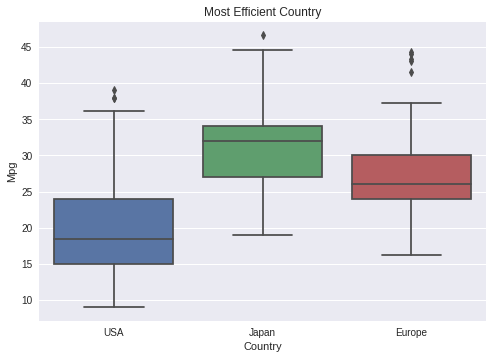

In [ ]:
# Creates a boxplot to analyse the hypothesis 
data['Country_code']= data.origin.replace([1,2,3],['USA','Europe','Japan']) # replace the values with the countries

plt.figure()
sns.boxplot(data=data,x='Country_code',y='mpg')# Find the median and interquartile
#labels
plt.xlabel("Country")
plt.ylabel("Mpg")
plt.title("Most Efficient Country")


 The median of Japanese cars is higher than those in the USA and Europe. In conclusion, Japanese cars are more efficient than those in other countries.

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

### What have you learned from this assigment?
The fundamental process of adding multiple  libraries to a set of data. This helped with the manipulation and interpretation of the dataset. These extensions included numpy, pandas, matplotlib, and seaborn. Inside this extension we utilazed groupby, aggregate, and plot to graph the data.

###Which parts were the most fun, time-consuming, enlightening, tedious?
1. Fun:
The most fun and rewarding part was creating visual data analysis to interpret the data.
2. Time consuming:
Manipulating the data  to remove or  use certains values  was the most time consuming.
3. Enlightening:
The process of learning to manipulate data with drop, aggregate, and groupby to intepret the results.
Tedious:




none